<a href="https://colab.research.google.com/github/MPGarg/TSCAI2.5/blob/main/Pytorch_101_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import important libraries
import torch
import torchvision # provide access to datasets, models, transforms, utils, etc
import torchvision.transforms as transforms

In [2]:
from torch.utils.data import Dataset

In [3]:
# Download Mnist data

train_set_mnist = torchvision.datasets.MNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
#create loader for testing
train_loader_mnist = torch.utils.data.DataLoader(
    train_set_mnist, 
    batch_size=32,
    shuffle=True
)

In [5]:
#set width to print
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [6]:
len(train_set_mnist)

60000

In [7]:
#distribution of data in MNIST
train_set_mnist.train_labels.bincount()

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

labels: tensor([9, 2, 1, 8, 2, 3, 7, 9, 4, 5, 6, 3, 2, 0, 9, 8, 6, 7, 3, 3, 5, 8, 4, 2, 4, 7, 7, 3, 9, 6, 3, 7])


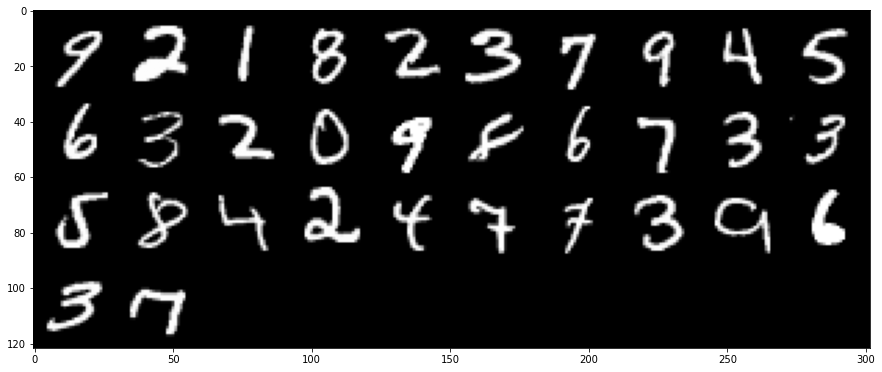

In [8]:
#printing batch
batch = next(iter(train_loader_mnist))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))
print('labels:', labels)

In [9]:
#creating dataset of Random Numbers
from torch.utils.data import Dataset
import torch.nn.functional as F
import torch.optim as optim

class RandomNo(Dataset):
  def __init__(self):
    rand_no = torch.randint(0, 10, (60000,))        #60000 number from 0 to 9, total number same as MNIST records
    self.data = F.one_hot(rand_no, num_classes=10)  #one hot encoding to be concatenated later
    self.label = rand_no                            #label for encoding values

  def __getitem__(self, index):
    return self.data[index], self.label[index]      #returning encoded data & label

  def __len__(self):
    return len(self.data)

In [10]:
#checking some generated numbers
randNo = RandomNo()

for m in randNo[:2]:
  print(m)

tensor([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])
tensor([2, 5])


In [11]:
#distribution of data
randNo.label.bincount()

tensor([5907, 5970, 5962, 6026, 5964, 6027, 6104, 6033, 6005, 6002])

In [12]:
#for checking loader
train_loader_rand = torch.utils.data.DataLoader(
    randNo, 
    batch_size = 5, 
    shuffle=True
)

In [13]:
#print 1 batch
for v in train_loader_rand:
  print(v)
  break

[tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]), tensor([9, 6, 9, 5, 1])]


In [14]:
#iterarator for random number
train_loader_rand_iter = iter(train_loader_rand)

In [15]:
#create model
import torch.nn as nn
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)       
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)      
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)     
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=512, kernel_size=3)    
    self.conv5 = nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3)    
    self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3)    
    self.fc1 = nn.Linear(in_features=512 * 3 * 3, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
    self.fc2 = nn.Linear(in_features=20, out_features=100)
    self.out2 = nn.Linear(in_features=100, out_features=19)
    
  def forward(self, t1, t2):          #input has 2 dataset
    # input layer
    x1 = t1
    # conv1 layer
    x1 = self.conv1(x1) # 28 -> 26 RF 3 In_Ch: 1  Out_Ch: 32
    x1 = F.relu(x1)
    x1 = self.conv2(x1) # 26 -> 24 RF 5 In_Ch: 32 Out_Ch: 64
    x1 = F.relu(x1)
    x1 = self.conv3(x1) # 24 > 22 RF 7  In_Ch: 64 Out_Ch: 128
    x1 = F.relu(x1)
    x1 = self.conv4(x1) # 22 > 20 RF 9  In_Ch: 128 Out_Ch: 512
    x1 = F.relu(x1)
    x1 = F.max_pool2d(x1, kernel_size=2, stride=2) # 20 > 10 RF 18 (assumption)
    x1 = self.conv5(x1) # 10 > 8 RF 20  In_Ch: 512 Out_Ch: 256
    x1 = F.relu(x1)
    x1 = self.conv6(x1) # 8 > 6 RF 22   In_Ch: 256 Out_Ch: 512
    x1 = F.relu(x1)
    x1 = F.max_pool2d(x1, kernel_size=2, stride=2) # 6 > 3 RF 44 (assumption)
    # reshapre
    x1 = x1.reshape(-1, 512 * 3 * 3)  #512 Channel & 3x3 output
    # fc1 layer
    x1 = self.fc1(x1)                 #FC Layer Output: 60
    x1 = F.relu(x1)
    # output layer for MNIST
    x1 = self.out(x1)                 #FC Layer Output: 10 (same as MNIST Classes)
    #predict class to be used as Input for SUM; one hot encoding for predicted number
    pred_cl_one = F.one_hot(torch.argmax(x1,dim=1), num_classes=10) 
    #concatenate first output & second input (we are using same batch number for both to be able to concatenate)
    x2 = torch.cat((pred_cl_one,t2), dim=1) #concatenate second input t2 & predicted class of t1
    x2 = x2.to(torch.float32)               #change dtype to allow data to pass to FC2
    x2 = self.fc2(x2)                       #Passing to FC layer Output: 100
    x2 = F.relu(x2)
    # output layer for SUM
    x2 = self.out2(x2)                      #Out layer for second input 100 & output: 19 (sum 0 to 18)
    return x1, x2                           #return both output

In [16]:
#get correct values
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [17]:
#Set CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [18]:
#run as test complete network
network = Network()
network.to(device)

#batch size as 128
train_loader_mnist = torch.utils.data.DataLoader(
    train_set_mnist, 
    batch_size=128,
    shuffle=True
)

#batch size as 128
train_loader_rand = torch.utils.data.DataLoader(
    randNo, 
    batch_size = 128, 
    shuffle=True
)

#optimizer as Adam
optimizer = optim.Adam(network.parameters(), lr=0.001)

total_loss_mnist = 0
total_correct_mnist = 0
total_loss_sum = 0
total_correct_sum = 0

#iterator to get next batch as we are looping on MNIST train loader 
#and getting next batch using iterator from random number
train_loader_rand_iter = iter(train_loader_rand)

for batch in train_loader_mnist: # Get Batch of image
    images, labels_mnist = batch 
    images = images.to(device)                            #push data to GPU
    randNum, labels_ranNo = next(train_loader_rand_iter)  #get next batch of Random Number
    randNum = randNum.to(device)                          #push to GPU
    preds_mnist, preds_sum = network(images,randNum)      # Pass data to Network 
    labels_mnist = labels_mnist.to(device)
    labels_ranNo = labels_ranNo.to(device)
    labels_sum = labels_mnist + labels_ranNo              #creating labels for Sum
    labels_sum = labels_sum.to(device)
    loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss for MNIST
    loss_ranNo = F.cross_entropy(preds_sum, labels_sum) # Calculate Loss for Sum 

    loss = loss_mnist + loss_ranNo    #Total loss
    optimizer.zero_grad()             
    loss.backward()
    optimizer.step() # Update Weights

    #calculating loss and correct prediction
    total_loss_mnist += loss_mnist.item()
    total_correct_mnist += get_num_correct(preds_mnist, labels_mnist)
    total_loss_sum += loss_ranNo.item()
    total_correct_sum += get_num_correct(preds_sum, labels_sum)

print(
    "epoch:", 0, 
    "tot_corr MNIST:", total_correct_mnist, 
    "loss MNIST:", total_loss_mnist,
    "tot_corr Sum:", total_correct_sum, 
    "loss SUm:", total_loss_sum    
)

epoch: 0 tot_corr MNIST: 52946 loss MNIST: 158.90911452751607 tot_corr Sum: 36344 loss SUm: 854.3731570243835


In [19]:
#running multiple epochs
network = Network()
network.to(device)

train_loader_mnist = torch.utils.data.DataLoader(
    train_set_mnist, 
    batch_size=128,
    shuffle=True
)
train_loader_rand = torch.utils.data.DataLoader(
    randNo, 
    batch_size = 128, 
    shuffle=True
)

optimizer = optim.Adam(network.parameters(), lr=0.001)

for epoch in range(15):
    total_loss_mnist = 0
    total_correct_mnist = 0
    total_loss_sum = 0
    total_correct_sum = 0

    train_loader_rand_iter = iter(train_loader_rand)

    for batch in train_loader_mnist: # Get Batch
        images, labels_mnist = batch 
        images = images.to(device)
        randNum, labels_ranNo = next(train_loader_rand_iter)
        randNum = randNum.to(device)
        preds_mnist, preds_sum = network(images,randNum) # Pass Batch
        labels_mnist = labels_mnist.to(device)
        labels_ranNo = labels_ranNo.to(device)
        labels_sum = labels_mnist + labels_ranNo
        labels_sum = labels_sum.to(device)
        loss_mnist = F.cross_entropy(preds_mnist, labels_mnist) # Calculate Loss
        loss_ranNo = F.cross_entropy(preds_sum, labels_sum) # Calculate Loss

        loss = loss_mnist + loss_ranNo
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # Update Weights

        total_loss_mnist += loss_mnist.item()
        total_correct_mnist += get_num_correct(preds_mnist, labels_mnist)
        total_loss_sum += loss_ranNo.item()
        total_correct_sum += get_num_correct(preds_sum, labels_sum)

    print(
        "epoch:", epoch, 
        "tot_corr MNIST:", total_correct_mnist, 
        "loss MNIST:", total_loss_mnist,
        "tot_corr Sum:", total_correct_sum, 
        "loss Sum:", total_loss_sum    
    )

epoch: 0 tot_corr MNIST: 55468 loss MNIST: 108.20154969859868 tot_corr Sum: 39569 loss Sum: 821.6886331439018
epoch: 1 tot_corr MNIST: 59118 loss MNIST: 22.661125325364992 tot_corr Sum: 59118 loss Sum: 130.49040120840073
epoch: 2 tot_corr MNIST: 59370 loss MNIST: 15.669793596083764 tot_corr Sum: 59370 loss Sum: 53.74286217615008
epoch: 3 tot_corr MNIST: 59494 loss MNIST: 12.041197097249096 tot_corr Sum: 59494 loss Sum: 37.91513303294778
epoch: 4 tot_corr MNIST: 59596 loss MNIST: 9.783126857451862 tot_corr Sum: 59596 loss Sum: 29.444651457481086
epoch: 5 tot_corr MNIST: 59686 loss MNIST: 7.921911828700104 tot_corr Sum: 59686 loss Sum: 23.57400557771325
epoch: 6 tot_corr MNIST: 59722 loss MNIST: 6.880392257982749 tot_corr Sum: 59722 loss Sum: 20.626847637817264
epoch: 7 tot_corr MNIST: 59759 loss MNIST: 5.67465770761919 tot_corr Sum: 59759 loss Sum: 18.28476608451456
epoch: 8 tot_corr MNIST: 59817 loss MNIST: 4.579824675518694 tot_corr Sum: 59817 loss Sum: 13.866899588610977
epoch: 9 tot

In [20]:
labels_mnist[:5], labels_ranNo[:5],labels_sum[:5]

(tensor([9, 0, 3, 2, 5], device='cuda:0'),
 tensor([9, 2, 3, 4, 4], device='cuda:0'),
 tensor([18,  2,  6,  6,  9], device='cuda:0'))

In [21]:
preds_mnist.argmax(dim=1)[:5]

tensor([9, 0, 3, 2, 5], device='cuda:0')

In [22]:
preds_sum.argmax(dim=1)[:5]

tensor([18,  2,  6,  6,  9], device='cuda:0')